In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
sales = pd.read_csv("BlackFriday.csv")

In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [6]:
sales.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [7]:
sales.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


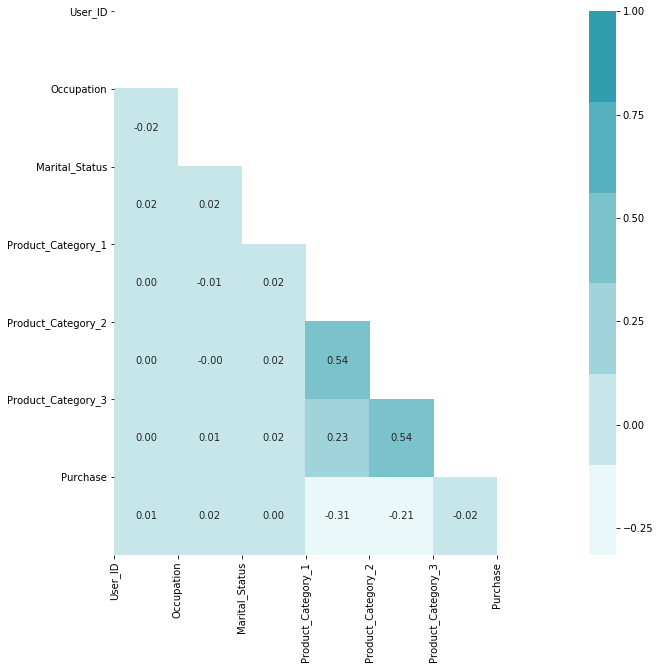

In [11]:
corr = sales.corr()
# Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
# Generate Color Map
colormap = sb.light_palette((210, 90, 60), input="husl")
# Generate Heat Map, allow annotations and place floats in map
sb.heatmap(corr, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf)
# Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
# Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

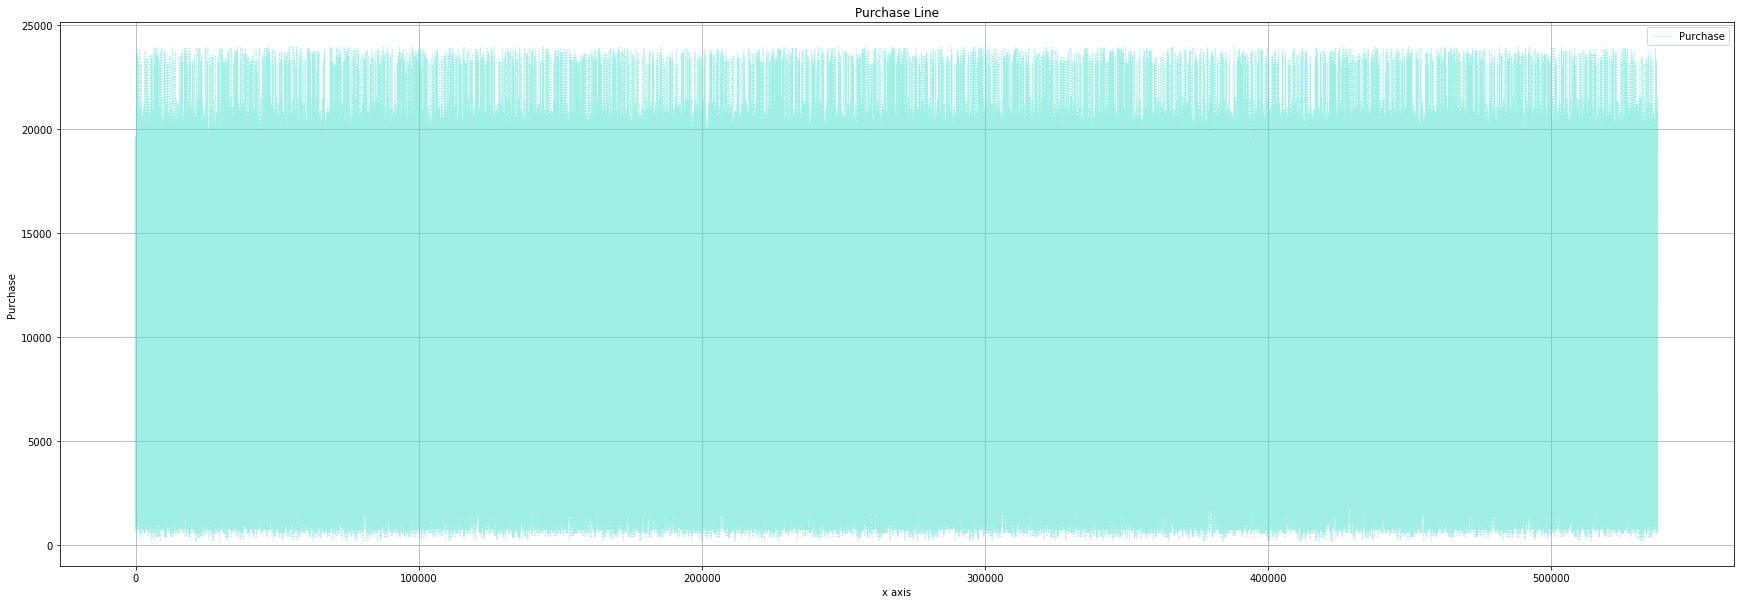

In [13]:
# plot Purchase
# kind = kind, color = color, label = label, linewidth = width of line, alpha = opacity,
# grid = grid, linestyle = sytle of line, figsize = figure size
sales.Purchase.plot(kind = 'line', color = 'turquoise', label = 'Purchase', linewidth=1, alpha = 0.5, grid = True, linestyle = ':', figsize=(30, 10))
plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('x axis')              # label = name of label
plt.ylabel('Purchase')
plt.title('Purchase Line')        # title = title of plot
plt.show()

In [14]:
# filtering Pandas data frame
myFilterParam = sales.Purchase < 1000
sales[myFilterParam].head(10)

# or
#data[ data.Purchase < 1000].head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
80,1000018,P0094142,F,18-25,3,B,3,0,4,5.0,NaN,697
122,1000023,P00112342,M,36-45,0,B,3,1,13,16.0,NaN,584
147,1000028,P00084442,F,26-35,1,C,2,1,13,16.0,NaN,758
175,1000033,P00219242,M,46-50,3,A,1,1,4,5.0,NaN,811
371,1000060,P00132042,M,51-55,1,C,1,1,13,16.0,NaN,742
536,1000097,P00089042,F,36-45,3,C,3,0,13,NaN,NaN,940
557,1000102,P00084642,M,36-45,19,C,3,0,13,16.0,NaN,929
739,1000139,P00227542,F,26-35,20,C,2,0,13,NaN,NaN,928
744,1000140,P00084642,F,36-45,1,B,3,0,13,16.0,NaN,770
774,1000146,P00112342,F,36-45,20,B,3,1,13,16.0,NaN,959


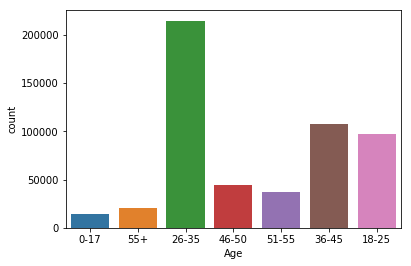

In [28]:
sb.countplot(sales['Age'])

In [16]:
# filtering Pandas with Numpy logical and
#data[ np.logical_and( data.Purchase > 23900, data.Gender == 'F') ]

# multi filtering (i don't know how right it is?)
sales[ np.logical_and( np.logical_and( sales.Purchase > 23900, sales.Gender == 'F'), sales.Age == '18-25' ) ]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
69228,1004579,P00119342,F,18-25,4,B,1,1,10,13.0,NaN,23936
88905,1001688,P00159542,F,18-25,4,C,4+,0,10,15.0,16.0,23932


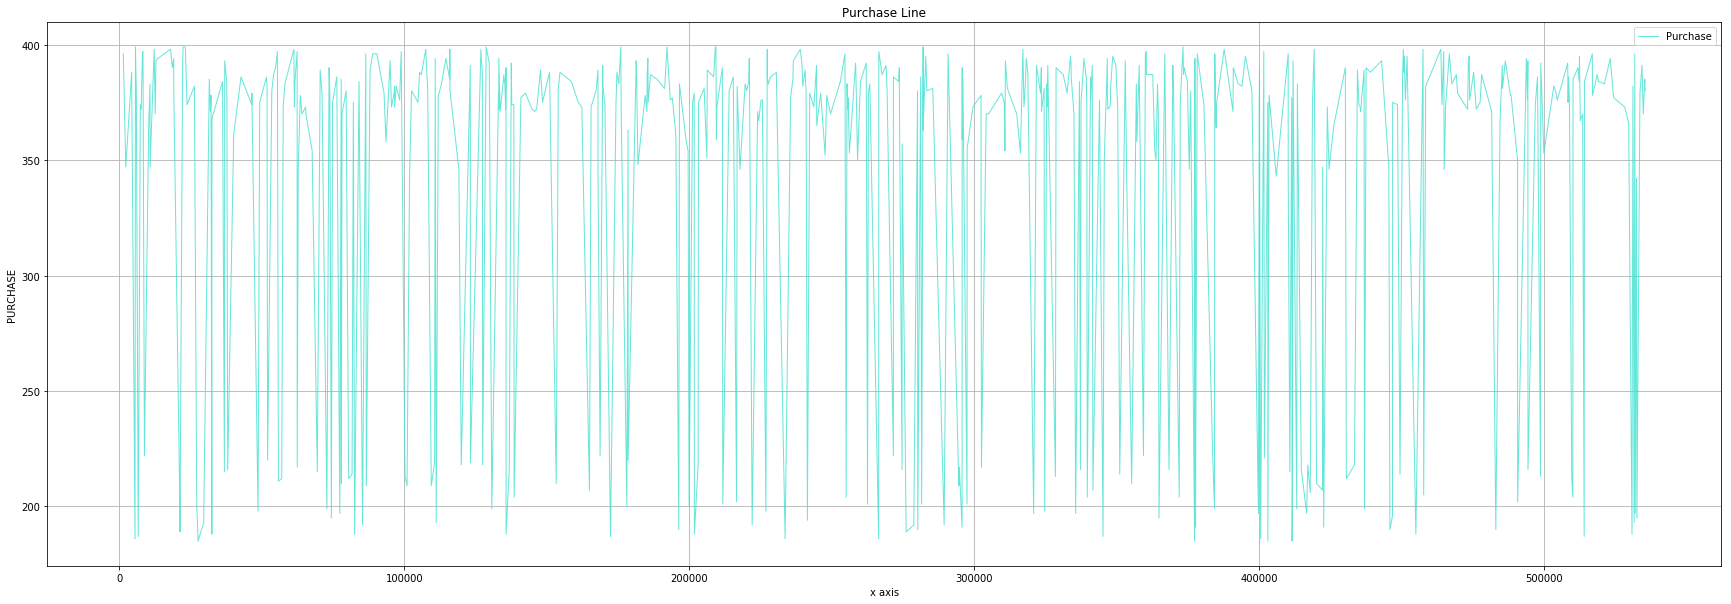

In [17]:
# Apply the filter to the data first, then draw the price from the filtered data
sales[ sales.Purchase < 400].Purchase.plot(figsize=(30, 10), kind = 'line', color = 'turquoise', label = 'Purchase', linewidth=1, alpha = 0.8, grid = True, linestyle = '-')
plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('x axis')              # label = name of label
plt.ylabel('PURCHASE')
plt.title('Purchase Line')            # title = title of plot
plt.show()

In [19]:
# unique values
print('Unique Product Category: {0}'.format( len( sales["Product_Category_1"].unique() )))
print('Unique Product ID: {0}'.format( len( sales["Product_ID"].unique() )))
print('Unique Occupation: {0}'.format( len( sales["Occupation"].unique() )))

Unique Product Category: 18
Unique Product ID: 3623
Unique Occupation: 21


In [20]:
print("Maximum Purchase: {0} $".format( sales.Purchase.max()))
print("Minimum Purchase: {0} $".format( sales.Purchase.min()))
print("Average Purchase: {0:.2f} $".format( sales.Purchase.mean()))
# {0:.2f} -> take two steps after zero
#print("Average Purchase: {0} $".format( data.Purchase.mean()))

Maximum Purchase: 23961 $
Minimum Purchase: 185 $
Average Purchase: 9333.86 $


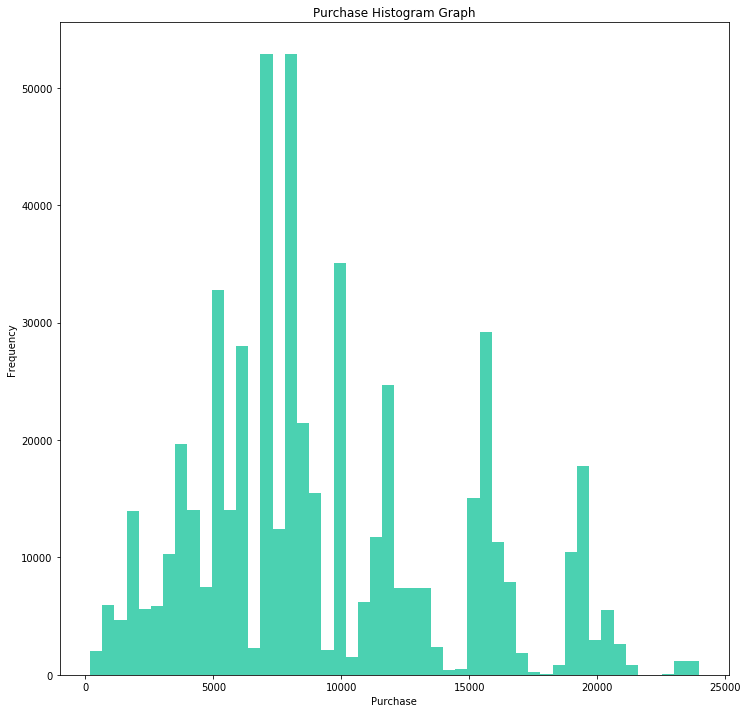

In [21]:
# plot Purchase
# kind = kine, color = color, bins = number of bar in figure, figsize = figure size
sales.Purchase.plot(kind = 'hist', color = "#4bd1b1", bins = 50, figsize=(12, 12))
plt.title('Purchase Histogram Graph')
plt.xlabel('Purchase')
plt.show()

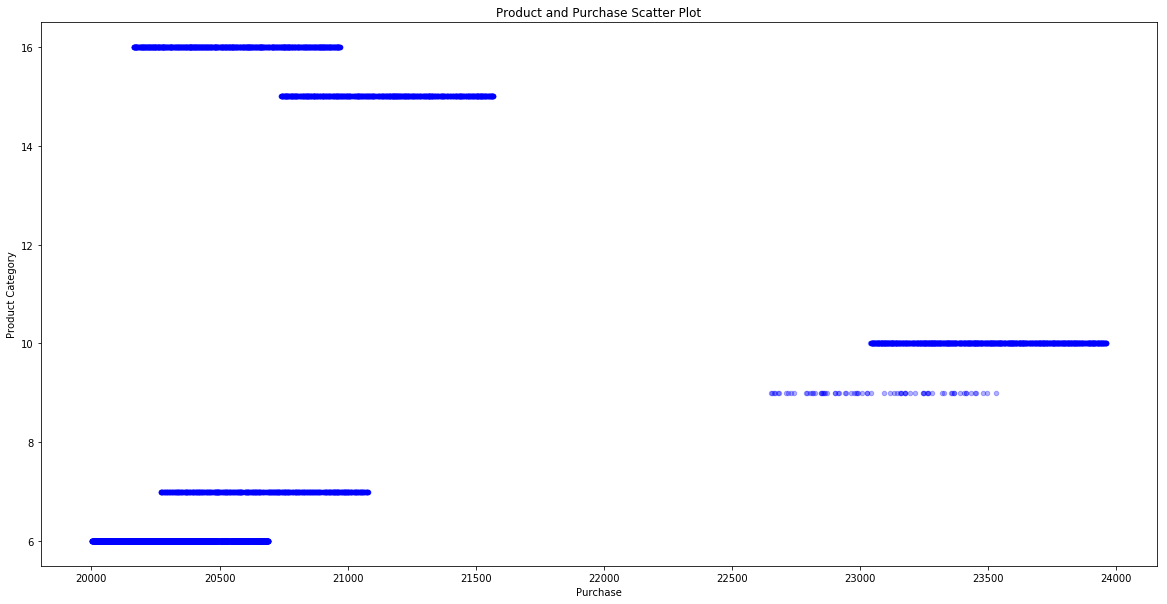

In [22]:
# plot Scatter
# price filtering before
sales[sales.Purchase > 20000].plot(kind='scatter', x='Purchase', y='Product_Category_1', alpha = 0.3, color = 'b', figsize=(20, 10))
#sales[sales.Purchase < 500].plot(kind='scatter', x='Purchase', y='Product_Category_1', alpha = 0.3, color = 'red', figsize=(20, 10))
plt.xlabel('Purchase')
plt.ylabel('Product Category')
plt.title('Product and Purchase Scatter Plot')
plt.show()

In [23]:
# get male and female user
male_user = sales[ sales[ 'Gender'] == 'M'].count()[0]
female_user = sales[ sales[ 'Gender'] == 'F'].count()[0]
print('Male user: {0}'.format(male_user))
print('Female user: {0}'.format(female_user))

Male user: 405380
Female user: 132197


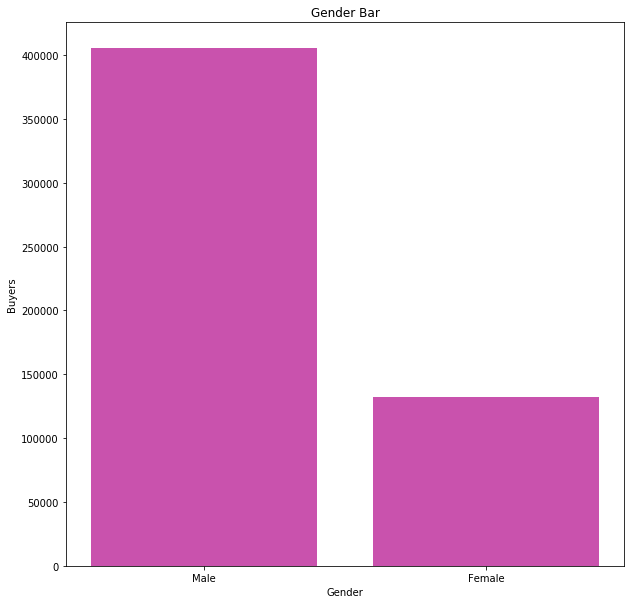

In [24]:
# draw figure
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.bar( ['Male', 'Female'], [male_user, female_user], color='#c952ad')
plt.title('Gender Bar')
plt.xlabel('Gender')
plt.ylabel('Buyers')
plt.show()

In [25]:
# total purchase by gender
male_purch = sales[ sales['Gender']=='M']['Purchase'].sum()
female_purch = sales[ sales['Gender']=='F']['Purchase'].sum()
print('Male user: {0}'.format(male_purch))
print('Female user: {0}'.format(female_purch))

Male user: 3853044357
Female user: 1164624021


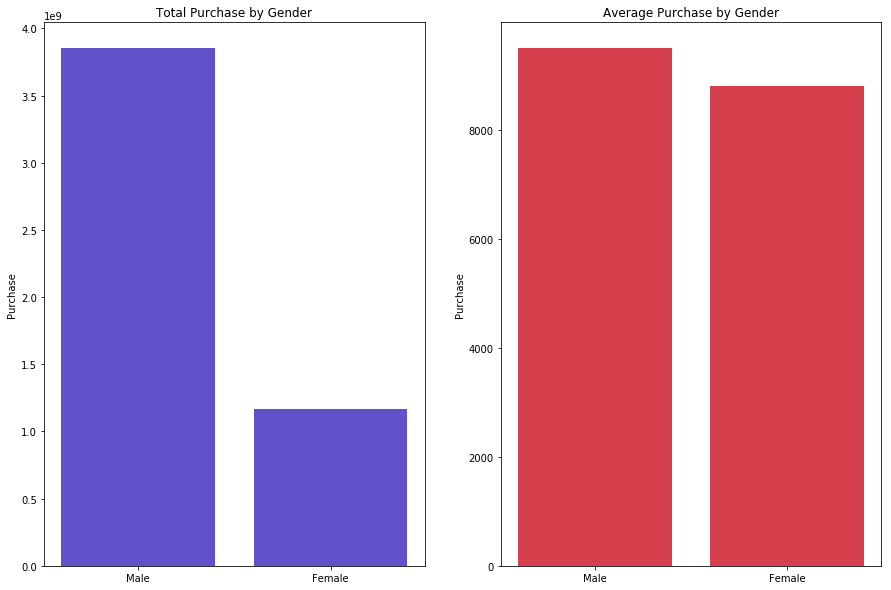

In [26]:
# draw figure
fig = plt.figure(figsize=(15,10))

# graph total purchase by gender
ax1 = fig.add_subplot(121)
ax1.bar( ['Male', 'Female'], [male_purch, female_purch], color='#6152c9')
plt.title('Total Purchase by Gender')
plt.ylabel('Purchase')

# graph total purchase by gender
ax2 = fig.add_subplot(122)
ax2.bar( ['Male', 'Female'], [male_purch/male_user, female_purch/female_user], color='#d6404c')
plt.title('Average Purchase by Gender')
plt.ylabel('Purchase')

plt.show()

 Recommendation
     ○ Suggest products based on age.
     ○ Suggest products based on location customers belong to.
     ○ Suggest products based on gender.